## Domača naloga 1
### Marko Tacer, 23222087

Pri nalogi 2 smo generirali signal s pomočjo generatorja. Signal smo izmerili na priključku 2 in tudi na priključku 1, katerega meritve so brezpomenske. Definirali smo obliko signala, frekvenco in amplitudo. Določili smo tudi frekvenco vzorčenja in število meritev v posameznem zajemu. Kot vidimo spodaj so meritve kanala 2 smiselne, medtem ko so meritve na kanalu 1 sicer podobne, a netočne in neuporabne. 

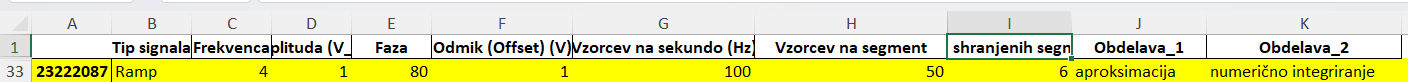

In [55]:
import numpy as np
import matplotlib.pyplot as plt
import lvm_read
file = 'DN_signal-MT.lvm'
loaded_data = lvm_read.read(file)
loaded_data.keys()
# signal = lvm_read.read(file)

dict_keys(['Decimal_Separator', 'Writer_Version', 'Reader_Version', 'Separator', 'Multi_Headings', 'X_Columns', 'Time_Pref', 'Operator', 'Date', 'Time', 0, 'Segments'])

In [60]:
data = loaded_data[0]['data'].T
N = data[0]
N1 = np.arange(0, 300)
t = data[1]
t1 = np.arange(0,0.5, 0.01)
kanal_1 = data[2]
kanal_2 = data[3]

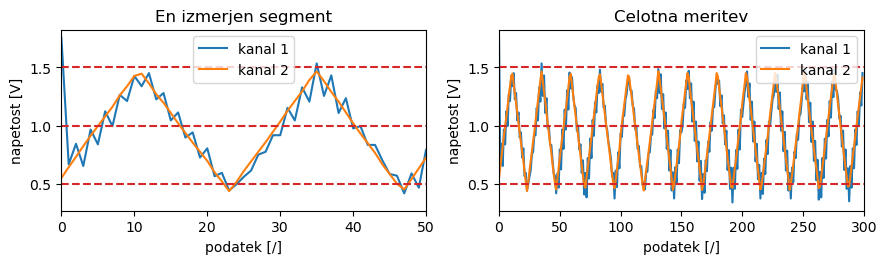

In [70]:
fig = plt.figure(figsize=(16, 8))

plt.subplot(3,3,1)
plt.gca().set_title('En izmerjen segment')
plt.plot(kanal_1, label='kanal 1')
plt.plot(kanal_2, label='kanal 2')
plt.xlabel('podatek [/]')
plt.ylabel('napetost [V]')
plt.xlim(0, 50)
plt.hlines(1, 0, 50, linestyles="dashed", color='C3')
plt.hlines(0.5, 0, 50, linestyles="dashed", color='C3')
plt.hlines(1.5, 0, 50, linestyles="dashed", color='C3')
plt.legend()

Tp = 300
plt.subplot(3,3,2)
plt.gca().set_title('Celotna meritev')
plt.plot(kanal_1, label='kanal 1')
plt.plot(kanal_2, label='kanal 2')
plt.xlabel('podatek [/]')
plt.ylabel('napetost [V]')
plt.xlim(0, Tp)
plt.hlines(1, 0, Tp, linestyles="dashed", color='C3')
plt.hlines(0.5, 0, Tp, linestyles="dashed", color='C3')
plt.hlines(1.5, 0, Tp, linestyles="dashed", color='C3')
plt.legend()

plt.show()

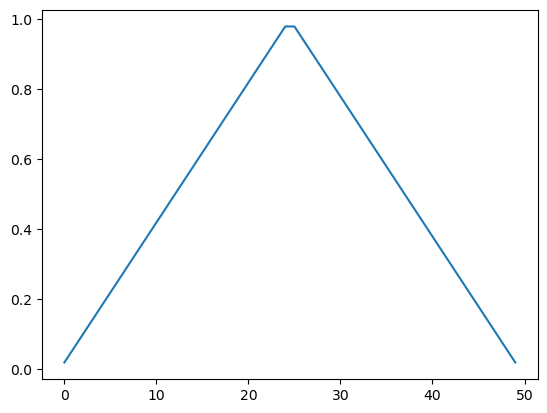

In [62]:
import scipy as sp
from scipy import signal
from scipy.signal import windows
A = 50
win = signal.triang(A)
plt.plot(win)

## Aproksimacija

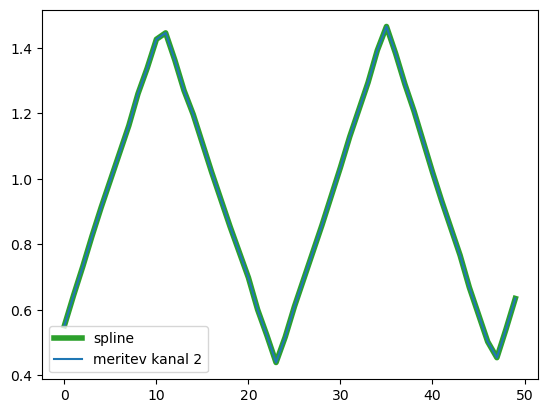

In [63]:
import scipy
spline = scipy.interpolate.UnivariateSpline(N[:50], kanal_2[:50])

spline.set_smoothing_factor(0)
plt.plot(N[:50], spline(N[:50]), 'C2', lw=4, label='spline')
plt.plot(N[:50], kanal_2[:50], label='meritev kanal 2')
plt.legend()
plt.show()

## Numerično integriranje

https://stackoverflow.com/questions/40475628/fourier-transform-of-triangle-wave-in-python

In [64]:
import pandas as pd

df = pd.DataFrame(dict(
    x = N1,
    y1 = kanal_1,
    y2 = kanal_2
))

In [65]:
# import plotly.express as px
# df = kanal_1
fig = px.line(df, x='x', y='y1')
fig.show()

NameError: name 'px' is not defined

In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt
# import lvm_read
# # file = 'DN_signal-MT.lvm'
# signal = lvm_read.read(file)

In [ ]:
# X_korak = signal[0]['Delta_X'][0]              #preberemo korak (časovni)
# p = np.array(signal[0]['data'].flatten())      #preberemo podatke v array
# x = np.arange(0, len(p) * X_korak, X_korak) 

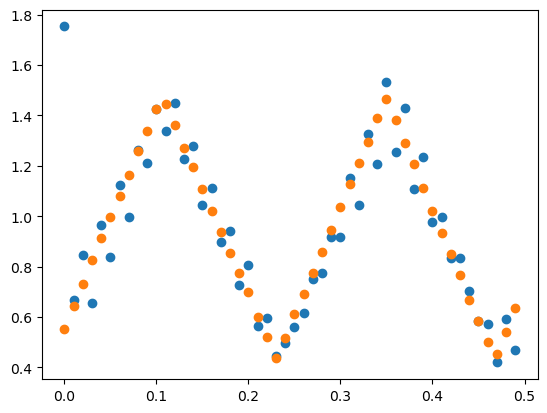

In [ ]:
# x = signal[0]['data'].flatten()[1:: 4]
# y1 = signal[0]['data'].flatten()[2:: 4]
# y2 = signal[0]['data'].flatten()[3:: 4]
# # plt.plot(x, y)
# plt.plot(x[:50], y1[:50], 'o')
# plt.plot(x[:50], y2[:50], 'o')